# <center> MagicBricks Data Analysis </center>

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Loading Dataset

df = pd.read_csv('Magicbricks.csv')

In [6]:
df

,Listing_ID,Location,Locality,BHK,Size,Price,Bathroom,Balcony,Furnishing,Transaction,Seller_Type,Listing_Date
0,MB101137,Kolkata,Salt Lake,3,524.0,3597233.0,4.0,3.0,Unfurn.,Resale,Broker,2024-01-30
1,MB100222,Pune,Viman Nagar,4,2547.0,22189240.0,3.0,2.0,Semi-Furnished,New,Broker,2023-07-07
2,MB100973,Kolkata,New Town,4,1719.0,15137167.0,3.0,3.0,Unfurnished,New,Broker,NaT
3,MB101370,Jaipur,Malviya Nagar,3,1393.0,6190887.0,3.0,0.0,Unfurn.,New,Broker,2024-04-16
4,MB100939,Delhi NCR,Rohini,5,2071.0,26041798.0,3.0,2.0,Semi-Furnished,Resale,Broker,2025-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,MB101092,Jaipur,Vaishali Nagar,1,820.0,6106246.0,1.0,1.0,Furnished,Resale,Owner,2023-02-10
1526,MB101192,Jaipur,Jagatpura,3,866.0,4630904.0,3.0,2.0,Unfurnished,New,Builder,2023-10-12
1527,MB101209,Hyderabad,Banjara Hills,2,1195.0,12180125.0,2.0,2.0,Furnished,New,Broker,2024-03-26
1528,MB101059,Chennai,Chromepet,3,1223.0,22979362.0,3.0,2.0,Semi-Furnished,New,Broker,NaT


In [7]:
#Clean Dataset

# Clean Size: extract numeric
df['Size'] = df['Size'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Clean Listing_Date: parse flexible
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce', dayfirst=True)

# Basic missing handling: drop rows where Price or Size missing
clean_df = df.dropna(subset=['Price','Size'])

## 📌Price Distribution (Histogram + KDE)

Text(0, 0.5, 'Count')

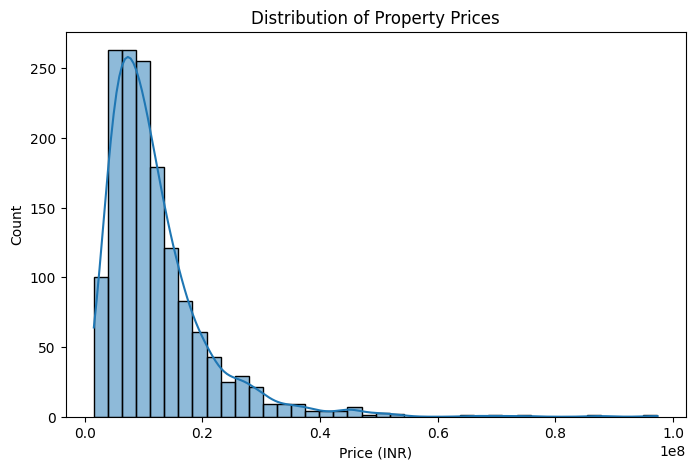

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=40)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Count")


#### Insights

- Price is right-skewed → most properties are affordable/mid-range, while a few expensive listings pull the tail.

- Majority properties fall between ₹40 lakh to ₹1.6 crore.

- Very high-value properties (> ₹5 crore) are outliers — likely luxury areas.

## 📌 Size Distribution (Histogram + KDE)

Text(0, 0.5, 'Count')

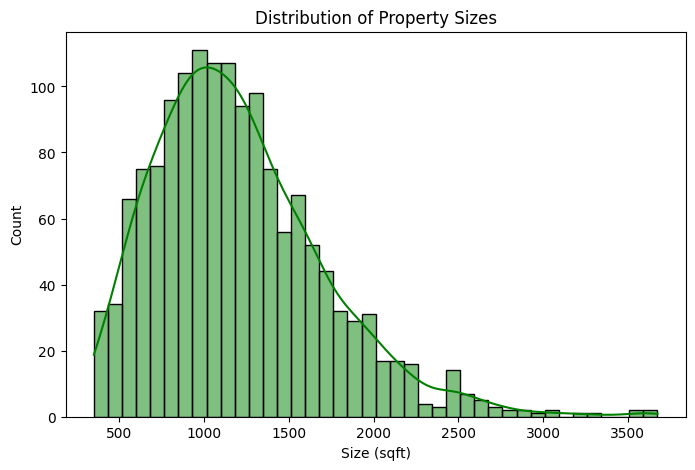

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Size'], kde=True, bins=40, color='green')
plt.title("Distribution of Property Sizes")
plt.xlabel("Size (sqft)")
plt.ylabel("Count")


### Insights

- Most houses are between 800–1500 sqft, matching typical 2–3 BHK apartments.

- Few very large units above 2500 sqft, indicating premium/luxury category.

## 📌 BHK Count Distribution (Count Plot)

Text(0, 0.5, 'Count')

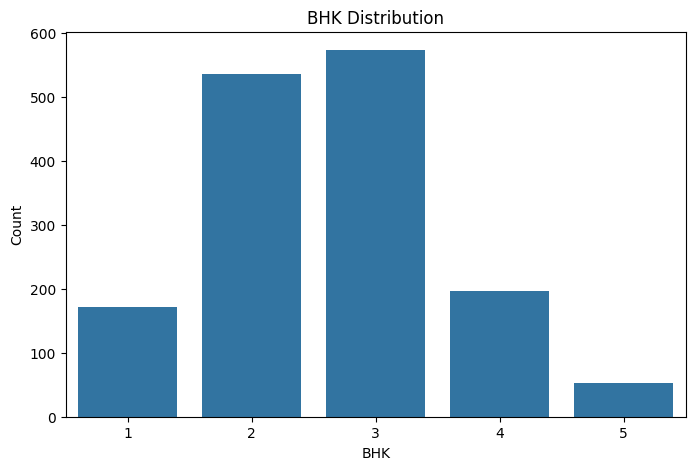

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='BHK', data=df)
plt.title("BHK Distribution")
plt.xlabel("BHK")
plt.ylabel("Count")


### Insights

- 2 BHK and 3 BHK dominate the dataset (70%+ of listings).

- 1 BHK and 5 BHK are rare — niche market segments.

## 📌 Price vs Size (Scatter Plot) 

Text(0.5, 1.0, 'Price vs Size')

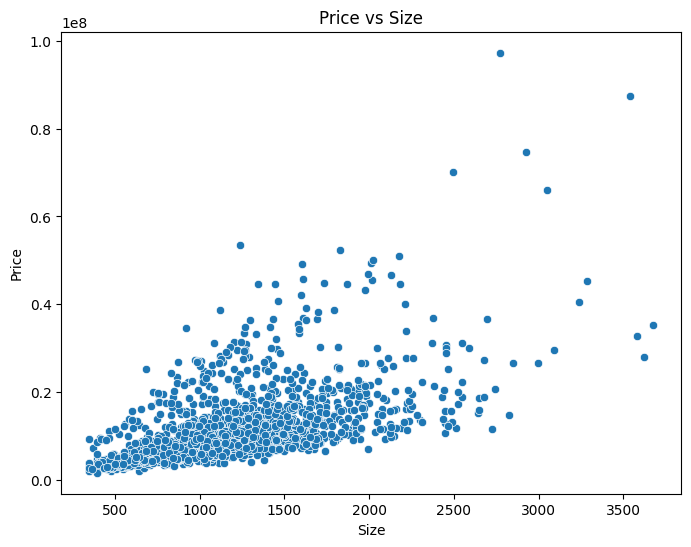

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Size', y='Price', data=df)
plt.title("Price vs Size")


### Insights

- Strong positive relationship → larger homes cost more.

- Significant spread shows influence of location, BHK, and amenities.

- Outliers suggest luxury/ultra-luxury real estate.

## 📌  Price vs BHK (Box Plot)

Text(0.5, 1.0, 'Price Distribution Across BHK')

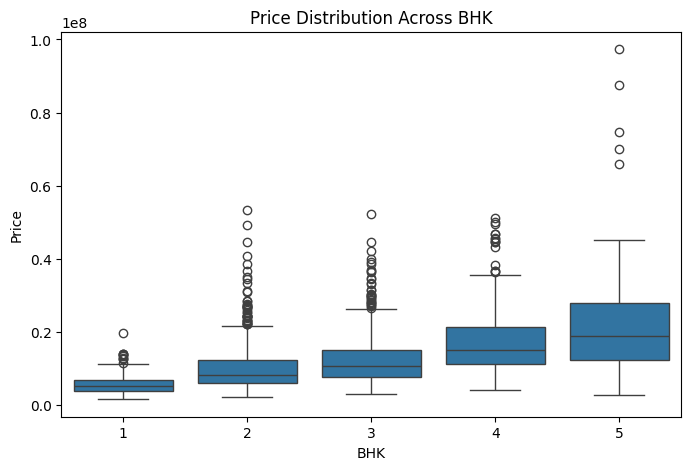

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='BHK', y='Price', data=df)
plt.title("Price Distribution Across BHK")


### Insights

- Price generally increases from 1 → 5 BHK.

- Overlapping ranges (especially 2 vs 3 BHK) show BHK is not the only factor influencing price.

## 📌 Price vs Furnishing Type (Violin Plot)

Text(0.5, 1.0, 'Price vs Furnishing Type')

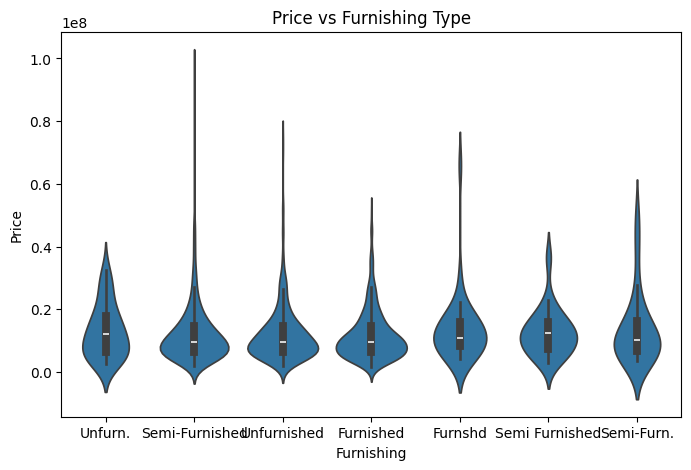

In [13]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Furnishing', y='Price', data=df)
plt.title("Price vs Furnishing Type")


### Insights

- Fully furnished units tend to have slightly higher prices.

- Unfurnished units have broad variance → depends heavily on location.

## 📌 Seller Type vs Transaction (HeapMap)

Text(0.5, 1.0, 'Seller Type vs Transaction Type')

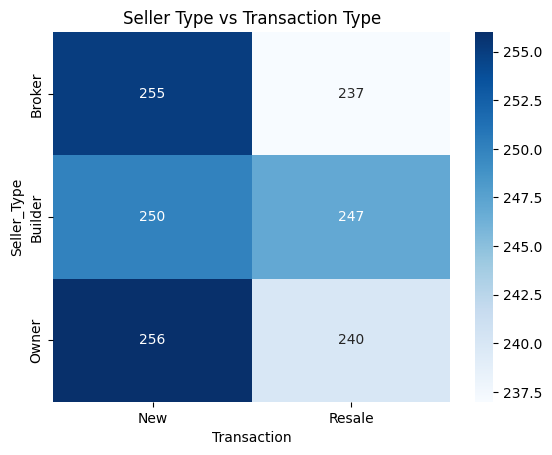

In [14]:
ct = pd.crosstab(df['Seller_Type'], df['Transaction'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Seller Type vs Transaction Type")


### Insights

- Brokers contribute the highest number of both resale and new listings.

- Owner-listed properties are mostly resale, not new construction.

## 📌  Price Over Time (Line Plot)

Text(0.5, 1.0, 'Property Prices Over Time')

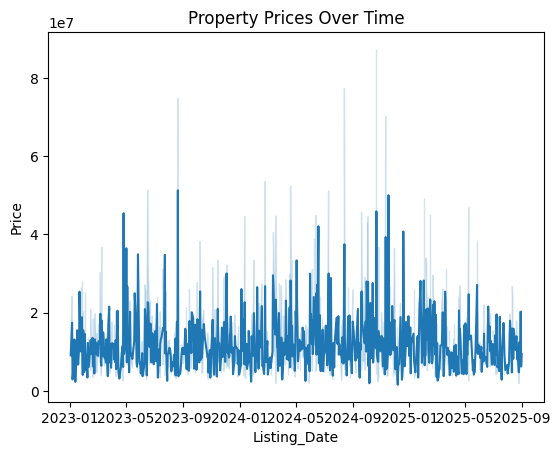

In [15]:
df_sorted = df.sort_values("Listing_Date")
sns.lineplot(x="Listing_Date", y="Price", data=df_sorted)
plt.title("Property Prices Over Time")


### Insights

- No strong trend → prices remain volatile, likely due to location-wise differences.

- Certain peaks correspond to high-value listings added on those dates.

## 📌  Correlation Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

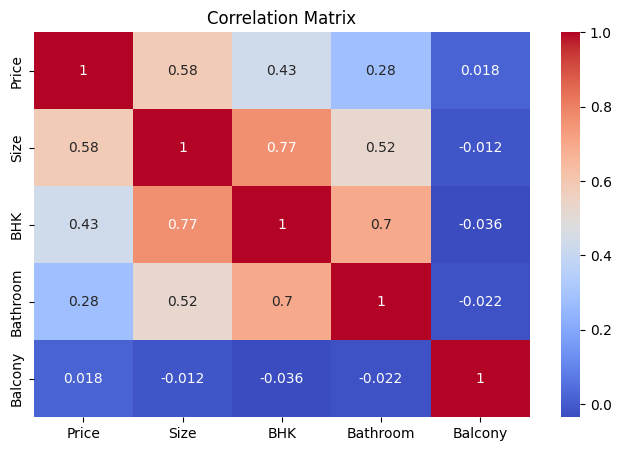

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Price','Size','BHK','Bathroom','Balcony']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


### Insights

- Price is most strongly correlated with:

    - Size (highest)

    - Bathroom count

    - BHK

- Bathrooms correlate more strongly with price than balconies.

## 📌  Pairplot

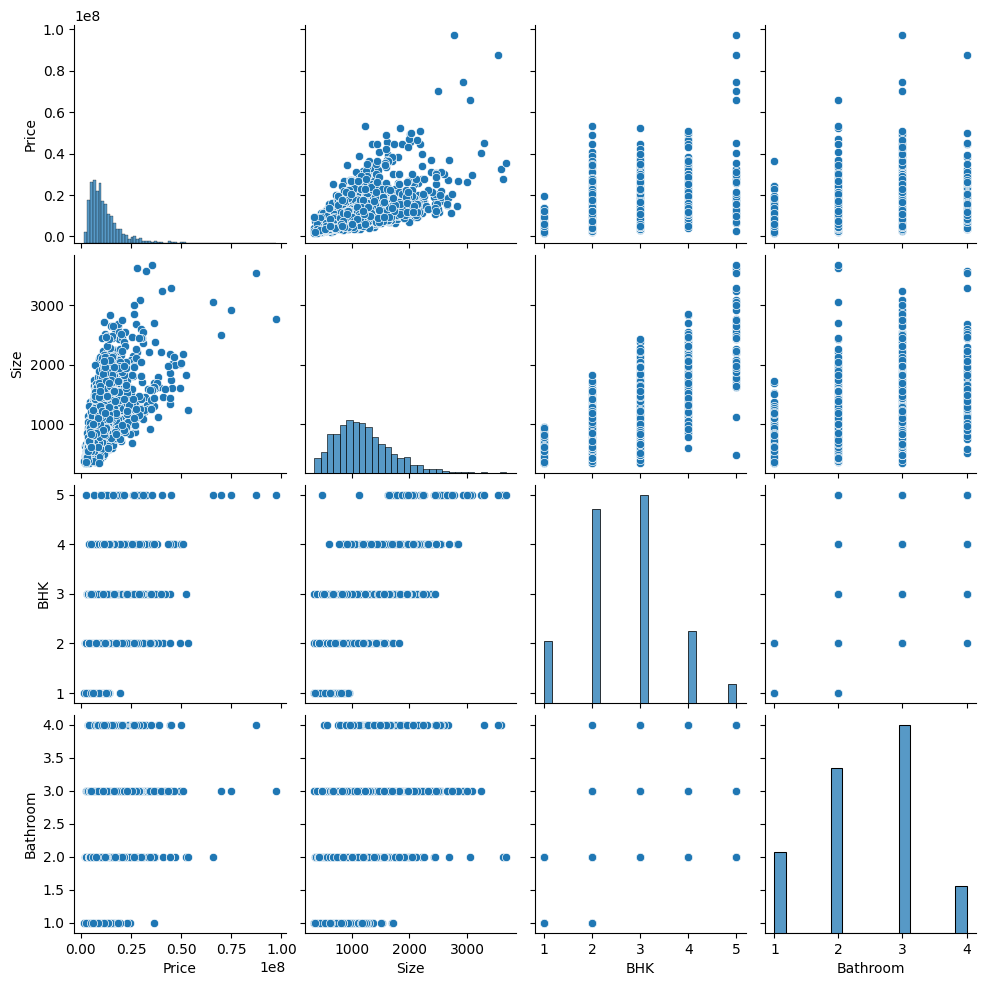

In [17]:
sns.pairplot(df[['Price','Size','BHK','Bathroom']])


### Insights

- Shows pairwise relationships clearly.

- Confirms: Larger homes have more rooms and bathrooms → higher price.